# Librerie e Serie dati

In [1]:
%load_ext autoreload
%autoreload 2


import matplotlib
from matplotlib import style
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

import yfinance as yf
import datetime as dt
#import seaborn as sns
import pandas as pd
import numpy as np
import math
from time import time
import sys
import os

from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, classification_report, matthews_corrcoef
from sklearn.metrics import mean_squared_error, roc_auc_score, r2_score

from nsp.nsp_utils import find_result, find_gap, find_hldif, find_emad, find_stoch, find_volat, segnale_base

from nsp.serie_process import Serie

### Serie trigonometrica di prova

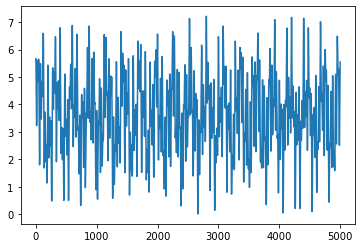

In [2]:
T = 5000
x = np.arange(0,T)
y=  np.sin(4.3*np.pi*x/200)+np.cos(8*np.pi*x/100)+np.cos(2.5*np.pi*x/50)+np.sin(0.9*np.pi*x/123)
y = y + abs(min(y)) + 0.01
plt.plot(x, y)

### Serie giornaliera

In [2]:
bitcoin_storico1 = '../bitcoin/Binance_BTCUSDT_d.csv'
df_bitcoin = pd.read_csv(bitcoin_storico1, skiprows=1)
df_bitcoin['Date'] = pd.to_datetime(df_bitcoin['Date'])
df_bitcoin.sort_values('Date', inplace=True)

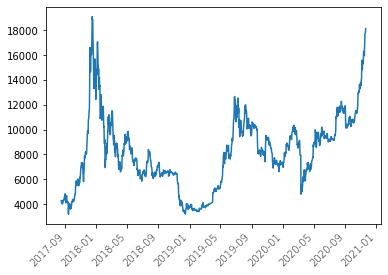

In [3]:
plt.plot(df_bitcoin['Date'], df_bitcoin['Close'])
plt.xticks(
    rotation=45,
    horizontalalignment='right',
    fontweight='light',
    fontsize='medium',
);

### Serie tempo reale

In [58]:
bitcoin_temporeale = '../bitcoin/BTCUSDT_Binance_Q3_2020_prints.csv'
df = pd.read_csv(bitcoin_temporeale)#, skiprows=1)
df['Date'] = pd.to_datetime(df['date'])
df = df.drop('date', axis=1)
df.set_index('Date', inplace=True)
df.sort_values('Date', inplace=True)

df_bitcoin_temporeale = df[['price', 'dollar_amount']]
#df_bitcoin_temporeale['Date'] = pd.to_datetime(df_bitcoin_temporeale['date'])
#df_bitcoin_temporeale.set_index('Date', inplace=True)
#df_bitcoin_temporeale.sort_values('Date', inplace=True)
#df_bitcoin_temporeale = df_bitcoin_temporeale.drop('date', axis=1)
df_bitcoin_temporeale = df_bitcoin_temporeale.resample('30min').agg({'price': 'mean', 'dollar_amount': 'sum'})

<AxesSubplot:xlabel='Date'>

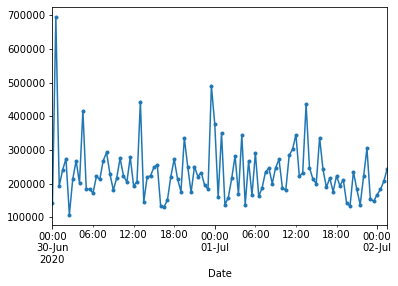

In [59]:
fig, ax = plt.subplots()
df_bitcoin_temporeale[:100].dollar_amount.plot(marker='.')#range=(0,25))
#ax.set_yscale('log')

<AxesSubplot:xlabel='Date'>

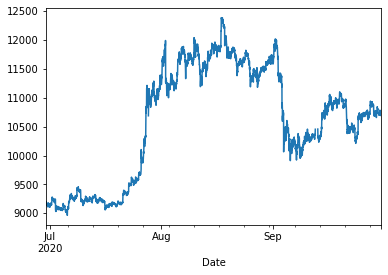

In [60]:
df_bitcoin_temporeale.price.plot()

In [ ]:
sinusoide = Serie(x,y)

In [7]:
bitcoin = Serie(df_bitcoin['Date'].values,  df_bitcoin['Close'].values, 'Close')

In [29]:
#btc_30minuti = Serie(df_bitcoin_temporeale.index, df_bitcoin_temporeale['price'].values, 'price')

### Indicatori aggiuntivi

In [8]:
# Period of Fast EMA
fast_emad = 8 #@param {type:"slider", min:1, max:16, step:1}
# Period of Slow EMA
slow_emad = 18 #@param {type:"slider", min:1, max:32, step:1}
# K period for the stochastic oscillator
k_stoch = 5 #@param {type:"slider", min:1, max:16, step:1}
# Smoothing Period for Stochastic Oscillator
smooth_stoch = 3 #@param {type:"slider", min:1, max:8, step:1}
# Volatility Calculation Period
period_volat = 6 #@param {type:"slider", min:1, max:16, step:1}
# Autocorrelation period
window_autocorr = 30 #@param {type:"slider", min:10, max:90, step:5}
# Autocorrelation lag
lag_autocorr = 4 #@param {type:"slider", min:1, max:10, step:1}

In [9]:
sinusoide.aggiungi_indicatori(window_autocorr, lag_autocorr, fast_emad, slow_emad, period_volat, k_stoch, smooth_stoch)

NameError: name 'sinusoide' is not defined

In [10]:
bitcoin.aggiungi_indicatori(window_autocorr, lag_autocorr, fast_emad, slow_emad, period_volat, k_stoch, smooth_stoch)

In [11]:
bitcoin.new_data

,Date,AUTCOR,Close,EMAD,VOLAT
0,2017-09-16,0.625651,0.031668,0.0,0.0
1,2017-09-17,0.629224,0.030726,0.0,0.0
2,2017-09-18,0.460450,0.051809,0.0,0.0
3,2017-09-19,0.440944,0.043945,0.0,0.0
4,2017-09-20,0.440500,0.043313,0.0,0.0
...,...,...,...,...,...
1145,2020-11-16,0.402265,0.849657,0.0,0.0
1146,2020-11-17,0.391202,0.909176,0.0,0.0
1147,2020-11-18,0.402551,0.916522,0.0,0.0
1148,2020-11-19,0.410291,0.918202,0.0,0.0


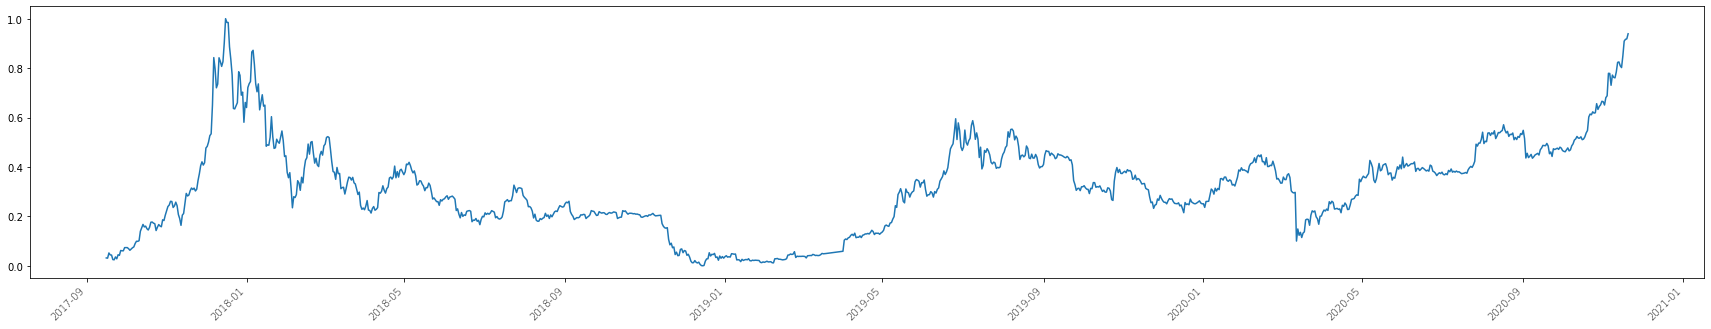

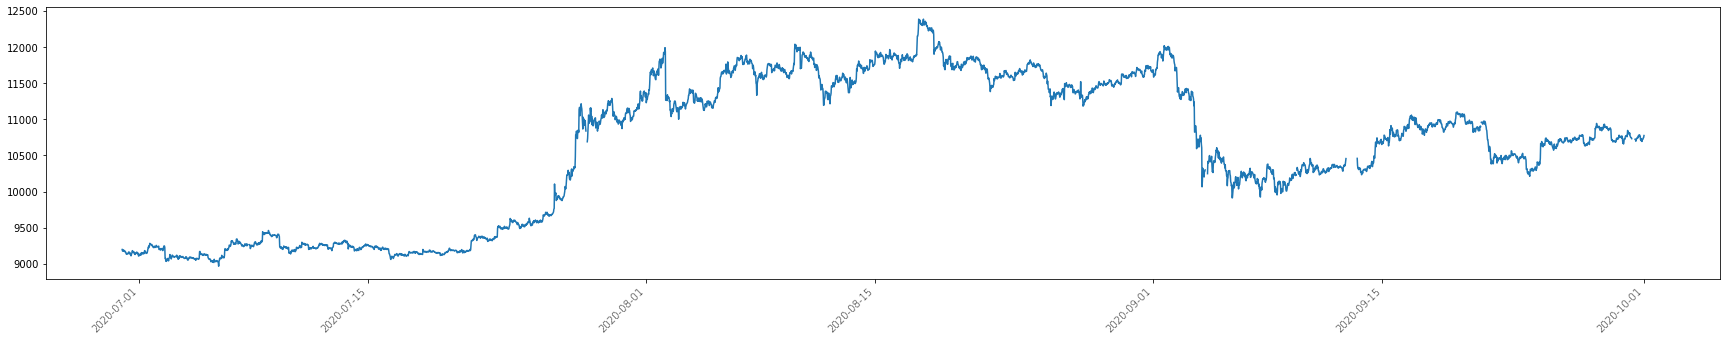

In [99]:
def plot_serie(serie, x, y):
    plt.figure(figsize=(30,5))
    plt.plot(serie[x], serie[y] )
    plt.xticks(
        rotation=45,
        horizontalalignment='right',
        fontweight='light',
        fontsize='medium',
    );
    
plot_serie(bitcoin.new_data, 'Date', bitcoin.NOME_VALORE)
plot_serie(btc_30minuti.df.reset_index(), 'Date', btc_30minuti.NOME_VALORE)

In [115]:
# da correggere
btc_30minuti = Serie(df_bitcoin_temporeale, 'price')

ci sono nan
price            57
dollar_amount     0
dtype: int64
ci sono ancora nan
price            0
dollar_amount    0
dtype: int64


<AxesSubplot:xlabel='Date'>

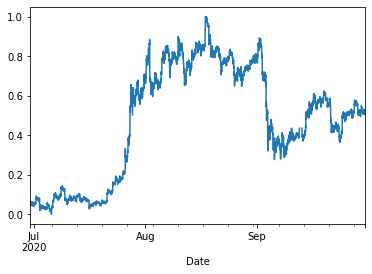

In [63]:
df_bitcoin_temporeale.price.plot()

<AxesSubplot:xlabel='Date'>

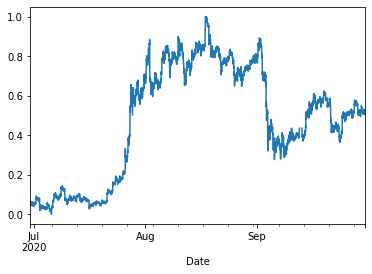

In [64]:
btc_30minuti.df.price.plot()

In [108]:
mask=btc_30minuti.df.price==0
mask.sum()

1

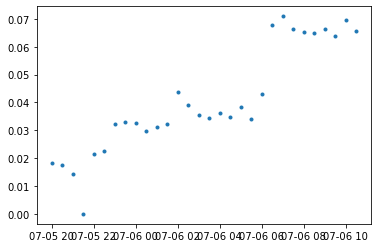

In [91]:
plt.plot(df_bitcoin_temporeale[280:310].price, '.')

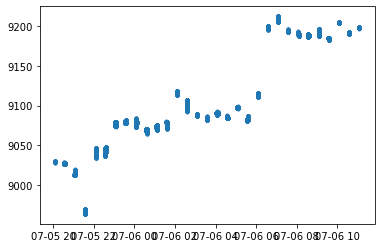

In [84]:
plt.plot(df[101400:112550].price, '.')

<AxesSubplot:xlabel='Date'>

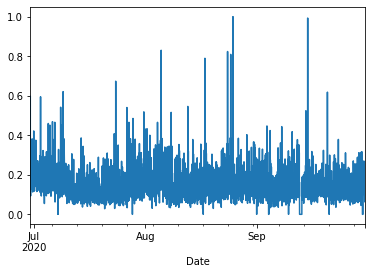

In [92]:
btc_30minuti.df.dollar_amount.plot()

In [93]:
WINDOW = 32   #da 10 a 90... 
PERCENT = 0.8   #train data
STEP = 1 
FORECAST = 1

In [117]:
data, label = btc_30minuti.crea_pezzetti_window2(WINDOW, STEP, FORECAST, ['dollar_amount'])
X_train, X_test, Y_train, Y_test = Serie.create_Xt_Yt(data, label, PERCENT)

In [118]:
data.shape, X_train.shape, X_test.shape

((4431, 32, 2), (3544, 32, 2), (887, 32, 2))

In [17]:
data, label = bitcoin.crea_pezzetti_window(WINDOW, STEP, FORECAST)

In [19]:
X_train, X_test, Y_train, Y_test = Serie.create_Xt_Yt(data, label, PERCENT)